## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras
from keras.datasets import cifar10
import warnings
warnings.filterwarnings('ignore')

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

# 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [3]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [4]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
# 超參數設定
LEARNING_RATE = [1e-3]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.5, 0.75, 0.95]
NESTEROV = [True, False]

In [6]:
results = {}

import itertools
for lr, momentum, nesterov in itertools.product(LEARNING_RATE, MOMENTUM, NESTEROV):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.3f, Momentum = %.2f, Nesterov = %s" % (lr, momentum, str(nesterov)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=nesterov, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s-nesterov-%s" % (str(lr), str(momentum), str(nesterov))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.001, Momentum = 0.50, Nesterov = True
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
________________________________________________________

196/196 [==============================] - 5s 25ms/step - loss: 1.5478 - accuracy: 0.4608 - val_loss: 1.5737 - val_accuracy: 0.4509
Experiment with LR = 0.001, Momentum = 0.50, Nesterov = False
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 

196/196 [==============================] - 5s 24ms/step - loss: 1.5522 - accuracy: 0.4594 - val_loss: 1.5688 - val_accuracy: 0.4535
Epoch 50/50
196/196 [==============================] - 5s 23ms/step - loss: 1.5479 - accuracy: 0.4599 - val_loss: 1.5677 - val_accuracy: 0.4507
Experiment with LR = 0.001, Momentum = 0.75, Nesterov = True
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                      

196/196 [==============================] - 5s 23ms/step - loss: 1.3989 - accuracy: 0.5116 - val_loss: 1.4597 - val_accuracy: 0.4855
Epoch 49/50
196/196 [==============================] - 4s 23ms/step - loss: 1.3942 - accuracy: 0.5126 - val_loss: 1.4619 - val_accuracy: 0.4854
Epoch 50/50
196/196 [==============================] - 4s 22ms/step - loss: 1.3886 - accuracy: 0.5148 - val_loss: 1.4567 - val_accuracy: 0.4861
Experiment with LR = 0.001, Momentum = 0.75, Nesterov = False
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                         

196/196 [==============================] - 4s 22ms/step - loss: 1.4229 - accuracy: 0.5011 - val_loss: 1.4763 - val_accuracy: 0.4770
Epoch 48/50
196/196 [==============================] - 4s 22ms/step - loss: 1.4179 - accuracy: 0.5033 - val_loss: 1.4709 - val_accuracy: 0.4811
Epoch 49/50
196/196 [==============================] - 5s 23ms/step - loss: 1.4109 - accuracy: 0.5067 - val_loss: 1.4774 - val_accuracy: 0.4792
Epoch 50/50
196/196 [==============================] - 4s 21ms/step - loss: 1.4051 - accuracy: 0.5079 - val_loss: 1.4603 - val_accuracy: 0.4808
Experiment with LR = 0.001, Momentum = 0.95, Nesterov = True
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                              

196/196 [==============================] - 4s 20ms/step - loss: 0.9310 - accuracy: 0.6722 - val_loss: 1.4058 - val_accuracy: 0.5181
Epoch 47/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9199 - accuracy: 0.6774 - val_loss: 1.4833 - val_accuracy: 0.5098
Epoch 48/50
196/196 [==============================] - 4s 21ms/step - loss: 0.9051 - accuracy: 0.6829 - val_loss: 1.3951 - val_accuracy: 0.5283
Epoch 49/50
196/196 [==============================] - 4s 20ms/step - loss: 0.8952 - accuracy: 0.6849 - val_loss: 1.3618 - val_accuracy: 0.5383
Epoch 50/50
196/196 [==============================] - 4s 21ms/step - loss: 0.8824 - accuracy: 0.6896 - val_loss: 1.3937 - val_accuracy: 0.5328
Experiment with LR = 0.001, Momentum = 0.95, Nesterov = False
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                 

196/196 [==============================] - 7s 35ms/step - loss: 1.0247 - accuracy: 0.6401 - val_loss: 1.3443 - val_accuracy: 0.5289
Epoch 46/50
196/196 [==============================] - 7s 35ms/step - loss: 1.0165 - accuracy: 0.6420 - val_loss: 1.3503 - val_accuracy: 0.5325
Epoch 47/50
196/196 [==============================] - 7s 36ms/step - loss: 0.9894 - accuracy: 0.6542 - val_loss: 1.3457 - val_accuracy: 0.5286
Epoch 48/50
196/196 [==============================] - 7s 34ms/step - loss: 0.9801 - accuracy: 0.6566 - val_loss: 1.3516 - val_accuracy: 0.5352
Epoch 49/50
196/196 [==============================] - 7s 35ms/step - loss: 0.9927 - accuracy: 0.6500 - val_loss: 1.4140 - val_accuracy: 0.5174
Epoch 50/50
196/196 [==============================] - 5s 28ms/step - loss: 0.9729 - accuracy: 0.6561 - val_loss: 1.3341 - val_accuracy: 0.5354


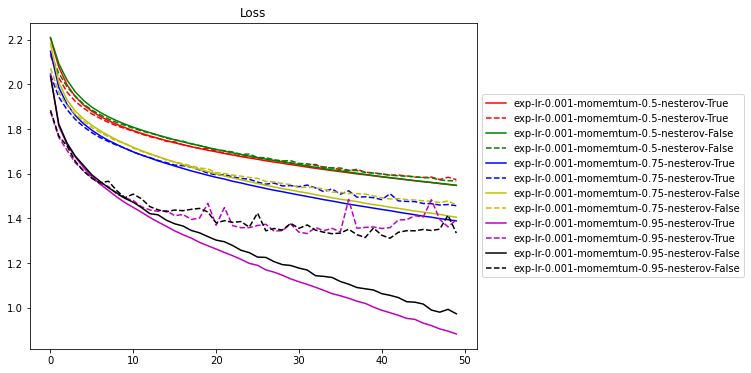

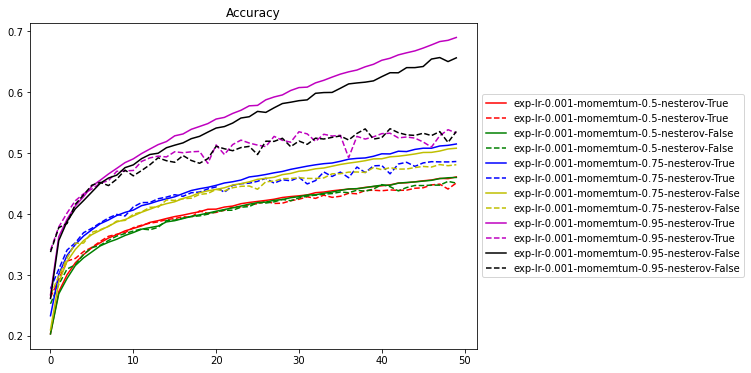

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### 筆記
1. Momemtum 越高, 會有overfitting 現象
2. Nesterov 是否有使用, 效果差異不大